In [2]:
# !pip install python-igraph
# !pip install matplotlib
# !pip install numpy
# !pip install scipy
# !pip install easygui
# !pip install cairocffi

In [75]:
import pandas as pd
import json
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Loading dataset

In [17]:
df = pd.read_csv('HR_edges.csv')

In [18]:
edges = list(df.to_records(index=False))

In [7]:
with open('HR_genres.json', 'r') as f:
    node_data = json.load(f)

In [19]:
node_attrs = [node_data[str(i)] for i in range(len(node_data))]

In [20]:


attributes = pd.DataFrame(node_attrs)

# get all distinct attributes names
genres = pd.DataFrame(columns=['genres'])
styles = []
for i in range(len(attributes.values[:,0])):
    style = attributes.values[i,0]
    if style not in styles:
        genres = pd.concat([genres, pd.DataFrame([style], columns=['genres'])])
        styles.append(style)

genres.head()
print(styles)


['Kids', 'Rap/Hip Hop', 'Pop', 'Jazz', 'International Pop', 'Singer & Songwriter', 'Indie Pop/Folk', 'Films/Games', 'Dance', 'Dancefloor', 'R&B', 'Latin Music', 'Indie Rock', 'Comedy', 'Hard Rock', 'Alternative', 'Reggae', 'Folk', 'Country', 'Metal', 'Rock', 'Film Scores', 'Electro', 'Classical', 'Rock & Roll/Rockabilly', 'Indie Pop', 'Techno/House', 'Jazz Hip Hop', 'Oldschool R&B', 'Brazilian Music', 'Dirty South', 'Bolero', 'Contemporary R&B', 'Asian Music', 'Indie Rock/Rock pop', 'Blues', 'Soul & Funk', 'Spirituality & Religion', 'Dancehall/Ragga', 'TV Soundtracks', 'Soundtracks', 'Tropical', 'Chill Out/Trip-Hop/Lounge', 'Bluegrass', 'Contemporary Soul', 'Opera', 'Instrumental jazz', 'Disco', 'Urban Cowboy', 'Sports', 'Trance', 'Electric Blues', 'Classical Period', 'TV shows & movies', 'Baroque', 'Dubstep', 'Country Blues', 'Nursery Rhymes', 'West Coast', 'Electro Hip Hop', 'African Music', 'Ranchera', 'Indian Music', 'Kids & Family', 'Modern', 'Old school soul', 'Delta Blues', 'Voc

In [21]:
# add edges and nodes to graph
g = ig.Graph(edges=edges, directed=False)
g.add_vertices(len(node_attrs))

In [22]:
for i in range(len(node_attrs)):
    g.vs[i]['ID'] = i

In [23]:
#setting node attributes
for i in range(len(node_attrs)):
    g.vs[i]['music_preferences'] = node_attrs[i]

In [63]:
g.summary()

'IGRAPH U--- 109146 498202 -- \n+ attr: ID (v), music_preferences (v)'

# First analysis

### Graph dimension

In [13]:
# graph dimensions
print(f"Number of nodes: {g.vcount()}")
print(f"Number of edges: {g.ecount()}")
print(f"number of connected components: {len(g.components())}" )

Number of nodes: 109146
Number of edges: 498202
number of connected components: 54574


In [14]:
# Distribution of top 1 genres
def plot_top1_distribution(g):
    " PLot the distribution of top 1 genres and return a counter of the genres"
    list_genres = []
    for i in range(len(g.vs['music_preferences'])):
        l = g.vs['music_preferences'][i]
        if l is not None:
            preference = l[0]
        if preference is not None:
            list_genres.append(preference)

    counter = Counter(list_genres)
    #plot the distribution of top 1 genres
    plt.bar(counter.keys(), counter.values())
    # increase size of plot
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.xticks(rotation=90)
    plt.show()
    return pd.DataFrame.from_dict(counter, orient='index').reset_index()  


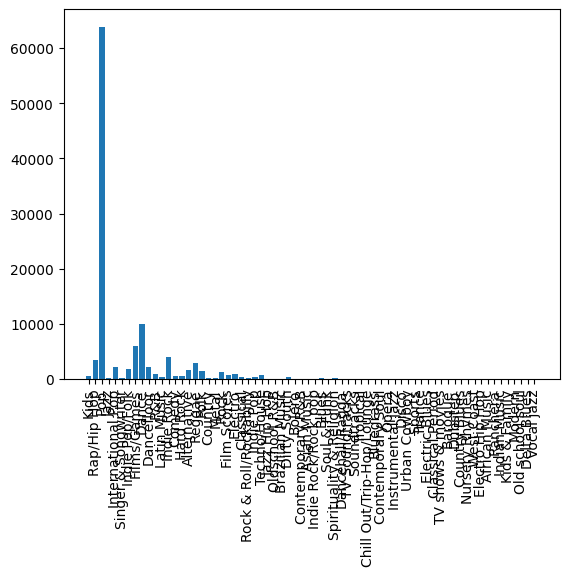

In [15]:
df_top1_occurences = plot_top1_distribution(g)

### Degree

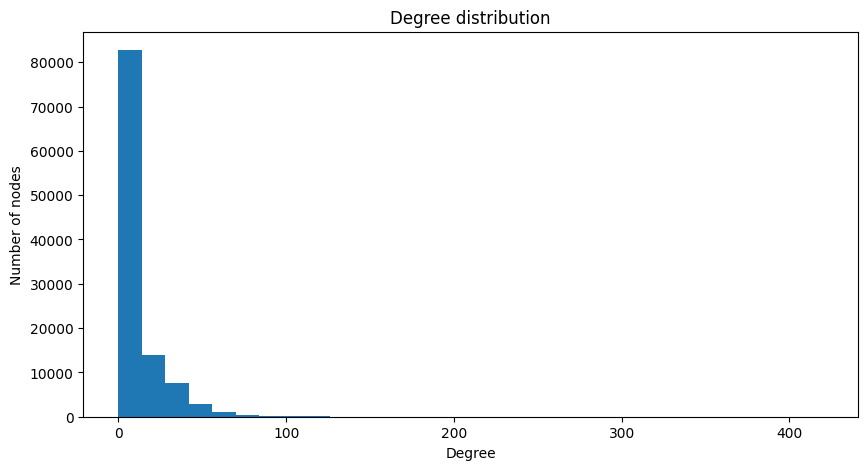

In [64]:
#plot degree distribution
plt.figure(figsize=(10,5))
degree = g.degree()
plt.hist(degree, bins=30)

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution')    
plt.show()

## degree per styles


C:\Users\alexi\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alexi\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[14.909090909090908, 20.70482603815937, 17.041059988351776, 17.896103896103895, nan, 23.233333333333334, nan, 3.0, 17.652125279642057, nan, 14.604651162790697, 15.928571428571429, nan, nan, nan, 15.886363636363637, 13.089285714285714, 18.325513196480937, 13.966666666666667, 12.75, 16.357001972386588, nan, 16.302325581395348, 15.484848484848484, nan, nan, nan, nan, nan, 16.0, nan, nan, nan, 16.166666666666668, nan, 19.0, 37.857142857142854, 9.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 27.0, nan, 13.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 18.666666666666668, nan, nan, nan, nan, nan, nan, nan]
68
68


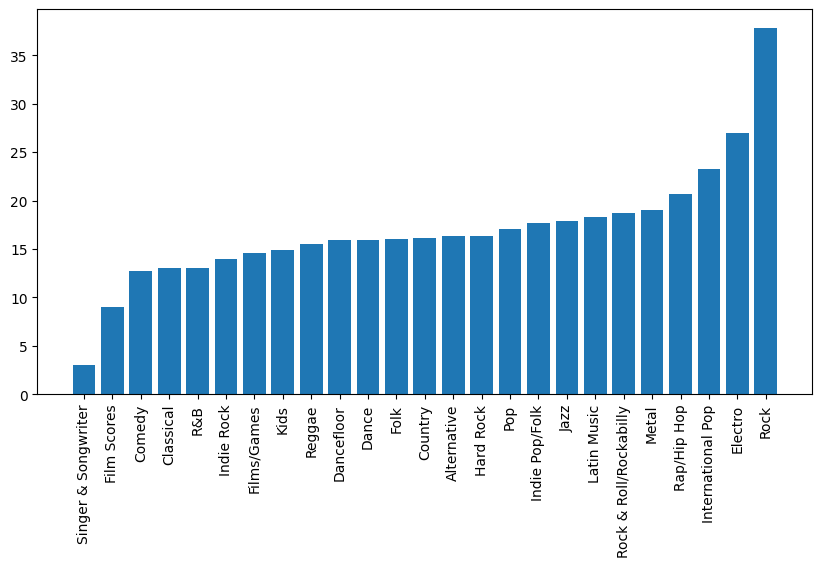

In [17]:
#plot the average degree for each top 1 genre
def plot_degree_per_genre(g, genres):
    degrees = []
    for genre in genres:
        genre_nodes = [v.index for v in g.vs if v['music_preferences'] == [genre]]
        genre_degree = g.degree(genre_nodes)
        degrees.append(np.mean(genre_degree))
    print(degrees)
    print(len(degrees))
    print(len(genres))
    #remove nan and sort
    degrees = [x for x in degrees if str(x) != 'nan']
    genres = [x for x in genres if str(x) != 'nan']

    genres = [x for _,x in sorted(zip(degrees,genres))]

    degrees = [x for x,_ in sorted(zip(degrees,genres))]

    degrees = sorted(degrees)

    plt.bar(genres, degrees)
  
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.xticks(rotation=90)
    plt.show()

plot_degree_per_genre(g, styles)

In [ ]:
#measure correlation between degree and betweeness for random nodes
def plot_degree_betweeness(g,n):
    degrees = []
    betweeness = []
    for i in range(n):
        node = np.random.randint(0, g.vcount())
        degrees.append(g.degree(node))
        betweeness.append(g.betweenness(node))
    plt.scatter(degrees, betweeness)
    plt.show()

plot_degree_betweeness(g, 100)

### Subgraph construction

TODO: subgraph not based on degree. Random?

In [14]:

import numpy as np
import igraph as ig

def plot_min_degree_subgraph(g, min_degree):
    np_degree = np.array(g.degree())
    mean_degree = np.mean(np_degree)
    print("Mean Degree:", mean_degree)

    min_degree_subgraph = g.subgraph([v.index for v in g.vs if v.degree() >= min_degree])

    visual_style = {}
    visual_style["vertex_size"] = 10
    visual_style["vertex_color"] = "blue"
    visual_style["edge_width"] = 1
    visual_style["layout"] = min_degree_subgraph.layout("fr")
    visual_style["bbox"] = (1000, 1000)
    visual_style["vertex_label"] = min_degree_subgraph.vs["music_preferences"][0]

    visual_style["margin"] = 40
    visual_style["vertex_label_dist"] = 1.6
    visual_style["vertex_label_color"] = "black"
    visual_style["edge_curved"] = False
    visual_style["edge_arrow_size"] = 0.2
    visual_style["edge_arrow_width"] = 0.2

    ig.plot(min_degree_subgraph, **visual_style)
    

min_degree = 100
plot_min_degree_subgraph(g, min_degree)


Mean Degree: 9.129093141296979


# Genre prediction

### Preprocessing

In [27]:
#remove missing values: nodes with no music preferences
g2 = g.subgraph([v.index for v in g.vs if v['music_preferences'] is not None])

Let's prepare the dataset

In [48]:
# create a dataframe with the genres of each nodes encoded
def encode_df(subgraph,styles, top1 = True):
    df_encoded = pd.DataFrame(columns=styles)
    for node in subgraph.vs:
        new_line = {}
        if top1:
            new_line[node['music_preferences'][0]] = 1
        else:
            for item in styles:
                if item in node['music_preferences']:
                    new_line[item] = 1
                else:
                    new_line[item] = 0
        #set index of the new line
        #set interger index
        new_line['ID'] = node['ID']
        df_encoded = df_encoded.append(new_line, ignore_index=True) 
    if top1:
        df_encoded.fillna(0, inplace=True)  
    #index to integer
    df_encoded['ID'] = df_encoded['ID'].astype(int)
    #set index of the dataframe
    df_encoded.set_index('ID', inplace=True) 
    return df_encoded

We work with a subgraph: we retain nodes with sufficent degree (meaningful nodes)

In [67]:
#subgraph creation
def get_subgraph(g, min_degree):
    subgraph_index = [v.index for v in g.vs if v.degree() >= min_degree]
    subgraph = g.subgraph(subgraph_index)
    return subgraph

In [ ]:
subgraph = get_subgraph(g, min_degree =70)
print(f"Number of nodes: {subgraph.vcount()}")

Number of nodes: 989


In [ ]:
#random node selection
def get_random_node(g):
    node = np.random.randint(0, g.vcount())
    return node

We will need the confusion matrix plot

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(df):
    # Get the true and predicted labels as arrays
    true_labels = df['true_label'].values
    predicted_labels = df['prediction'].values

    # Create a confusion matrix
    # Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    labels = np.unique(np.concatenate((true_labels, predicted_labels)))
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.xlabel('Predicted Label')
    #rotate xticks
    plt.xticks(rotation=90)
    plt.ylabel('True Label')

    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # # Fill the matrix cells with the rounded percent values
    # thresh = cm.max() / 2.
    # for i, j in np.ndindex(cm.shape):
    #     plt.text(j, i, format(cm[i, j], 'd'),
    #              horizontalalignment="center",
    #              color="white" if cm[i, j] > thresh else "black")

    plt.show()

### Neigborhood frequencies approach

In [ ]:
# first approach: prediction based on the most common top 1 genre in the neighborhood
import random
from collections import Counter
# prediction genres
def freq_genre_prediction(g, node_id, order=1):
    neighbors = g.neighbors(node_id)
    #case with no neighbors: random prediction
    if len(neighbors) == 0:
        return random.choice(styles)
    genres = []
    for i in range(len(neighbors)):
        genres.append(g.vs['music_preferences'][neighbors[i]][0])
        if order > 1:
            genres.append(freq_genre_prediction(g, neighbors[i], order=order-1))
    counter = Counter(genres)
    return counter.most_common(1)[0][0]

In [ ]:
#test the output for a node withou neighbors
freq_genre_prediction(subgraph, 14, order=1)

'Pop'

In [ ]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

def test_prediction(g, order=1):
    score = 0
    test_fpred_df = pd.DataFrame(columns=['node_id', 'prediction', 'true_label'])
    for i in g.vs:
        #fill the dataframe
        new_line = {}
        new_line['node_id'] = i.index
        predicted = freq_genre_prediction(g, i.index, order)
        true_label = i['music_preferences'][0]
        new_line['prediction'] = predicted
        new_line['true_label'] = true_label
        test_fpred_df = test_fpred_df.append(new_line, ignore_index=True)
        if predicted == true_label:
            score += 1
    print(f"Accuracy: {score/g.vcount()}")
    return test_fpred_df


In [ ]:
#hide warnings
import warnings
import random
warnings.filterwarnings('ignore')

def test_prediction(g, order=1, sample_size=100):
    sample_nodes = random.sample(range(g.vcount()), sample_size)
    score = 0
    test_fpred_df = pd.DataFrame(columns=['node_id', 'prediction', 'true_label'])
    for node_id in sample_nodes:
        vertex = g.vs[node_id]
        if vertex['music_preferences'] == None:
            continue
        new_line = {}
        new_line['node_id'] = vertex.index
        predicted = freq_genre_prediction(g, vertex.index, order)
        true_label = vertex['music_preferences'][0]
        new_line['prediction'] = predicted
        new_line['true_label'] = true_label
        test_fpred_df = test_fpred_df.append(new_line, ignore_index=True)
        if predicted == true_label:
            score += 1
    print(f"Accuracy: {score/sample_size}")
    return test_fpred_df


In [ ]:
#hide warnings
import warnings
import random
warnings.filterwarnings('ignore')

def test_prediction(g, order=1, sample_size=100):
    sample_nodes = random.sample(range(g.vcount()), sample_size)
    score = 0
    test_fpred_df = pd.DataFrame(columns=['node_id', 'prediction', 'true_label'])
    for node_id in sample_nodes:
        vertex = g.vs[node_id]
        if vertex['music_preferences'] == None:
            continue
        new_line = {}
        new_line['node_id'] = vertex.index
        predicted = freq_genre_prediction(g, vertex.index, order)
        true_label = vertex['music_preferences'][0]
        new_line['prediction'] = predicted
        new_line['true_label'] = true_label
        test_fpred_df = test_fpred_df.append(new_line, ignore_index=True)
        if predicted == true_label:
            score += 1
    print(f"Accuracy: {score/sample_size}")
    return test_fpred_df


Accuracy: 0.142


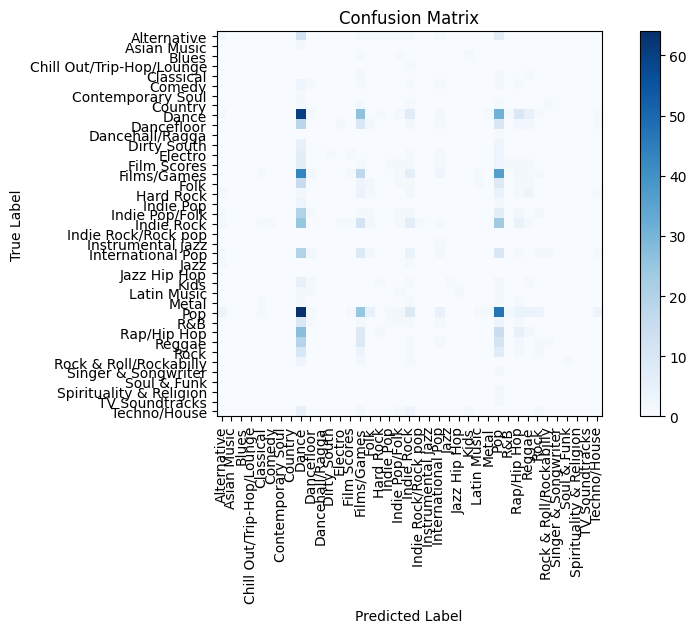

In [ ]:
test_fpred_df = test_prediction(g2, order=1, sample_size=1000)

#plot confusion matrix
plot_confusion_matrix(test_fpred_df)

The test on the subgraph with a min degree of 100 gives the following results:
With only order 1 we got 11% of accuracy. 
Then we added the order hyperparameter. A high order implies heavy computation and more smoothed predictions (less diversity). In fact, the mojority of 'Danse' prediction is emphasized with order large because the overall majority of top 1 genre is 'Danse' in our dataset. A small order implies on the contrary more balanced prediction and faster computation. But a too small value doesn't find all the actual 'Danse' preferences. A good trade-off value is order=2. It gives 30% accuracy. 
The problem with this method is that it focuses on frequencies but the genre distribution is very unbalanced. Hence, our predictions mask all the unfrequent genres.
With random nodes (node necessarly with high degree) the method have 14% accuracy with order 1 and 22% with order 2.Order 3 takes to much time to run so it is not a convenient value to work with.

### Link based approach

In this section we try to learn on a balanced dataset the genre of nodes based on there environment inside the graph. 
Now we will need a train set. Let's plit to keep a part for testing.

In [25]:
import random

def build_balanced_dataset(g, n, genres):
    nodes = []

    for genre in genres:
        genre_nodes = [v.index for v in g.vs if v['music_preferences'] == [genre]]
        
        
        if len(genre_nodes) < n:
            genre_nodes = random.sample(genre_nodes, len(genre_nodes))
        
        else :
             genre_nodes = random.sample(genre_nodes, n)
        nodes.extend(genre_nodes)

    return g.subgraph(nodes)
    


In [77]:
#plot trainset distribution
subg = get_subgraph(g2, 50)
subgraph = build_balanced_dataset(subg, 100, styles)
#sub_distr = plot_top1_distribution(subgraph)
subgraph.summary()

'IGRAPH U--- 289 341 -- \n+ attr: ID (v), music_preferences (v)'

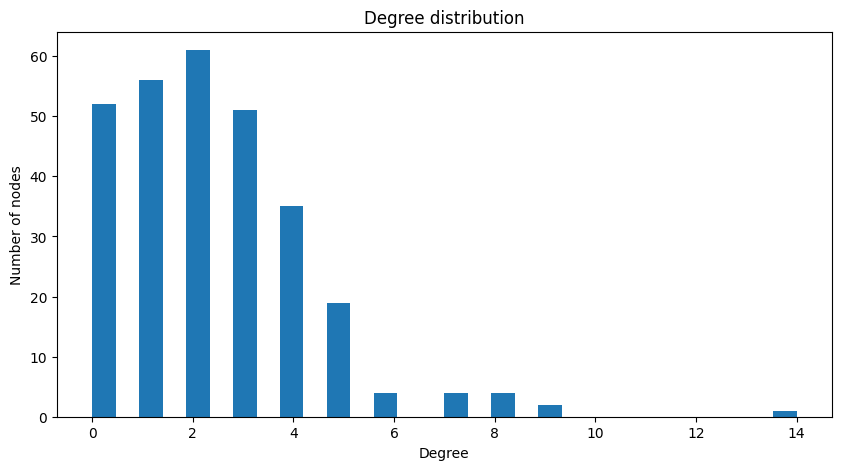

In [78]:
#plot degree distribution
plt.figure(figsize=(10,5))
degree = subgraph.degree()
plt.hist(degree, bins=30)

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution')    
plt.show()

In [71]:
#Define style from network plotting
visual_style = {}
#visual_style["vertex_size"] = [max(0.2, size / 20) for size in cluster_graph0.vs["size"]],
visual_style["vertex_label"]=None
visual_style["vertex_color"] = "red"
visual_style["edge_width"] = 0.8
#visual_style["edge_color"]=cluster_graph0.es["color"]

plt = ig.plot(subgraph,
              **visual_style)

plt.save('Clusters_Level_3.png')

## Node2 VEC


In [31]:
# Perform graph embedding with node2vec
import networkx as nx
def preprocess_graph(subgraph):
    G = subgraph.to_networkx()
    #set ID as node labels for G
    ID = {}
    for i in range(len(subgraph.vs)):
        ID[i] = subgraph.vs['ID'][i]
    nx.set_node_attributes(G, ID, 'ID')
    return G


In [32]:
from node2vec import Node2Vec
def node2vec_embedding(G):
    node2vec = Node2Vec(G, dimensions=30, walk_length=80, num_walks=10, workers=10)
    # Embed nodes
    model = node2vec.fit(window=10, min_count=1)
    return model


In [33]:
#  Prepare feature matrix and target labels
def get_features_labels(G, df_encoded, model):
    X = []
    y = []
    for node in G.nodes():
        embedding = model.wv[node]
        X.append(embedding)
        y.append(df_encoded.loc[G.nodes[node]['ID']])
    y = np.array(y)
    y = np.argmax(y, axis=1)
    return np.array(X), y

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [79]:
import warnings
warnings.filterwarnings('ignore')
print('get subgraph')  
subgraph1 = subgraph.copy()
print('subgraph size: ', subgraph1.vcount())
df_top1_encoded = encode_df(subgraph1,styles, top1 = True)
print('subgraph encoded')
G = preprocess_graph(subgraph1)
print('graph preprocessed')
model = node2vec_embedding(G)
print('model fitted')
X, y = get_features_labels(G, df_top1_encoded, model)
print('features and labels extracted')
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

get subgraph
subgraph size:  289
subgraph encoded
graph preprocessed


Computing transition probabilities:   0%|          | 0/289 [00:00<?, ?it/s]

model fitted
features and labels extracted


In [96]:

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6,criterion='gini')
#classifier = SVC(gamma= 10, kernel= 'poly')
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
y_pre_train = classifier.predict(X_train)
#training accurcay
print("training accuracy =", accuracy_score(y_train,y_pre_train))

Accuracy: 0.39655172413793105
training accuracy = 0.7878787878787878


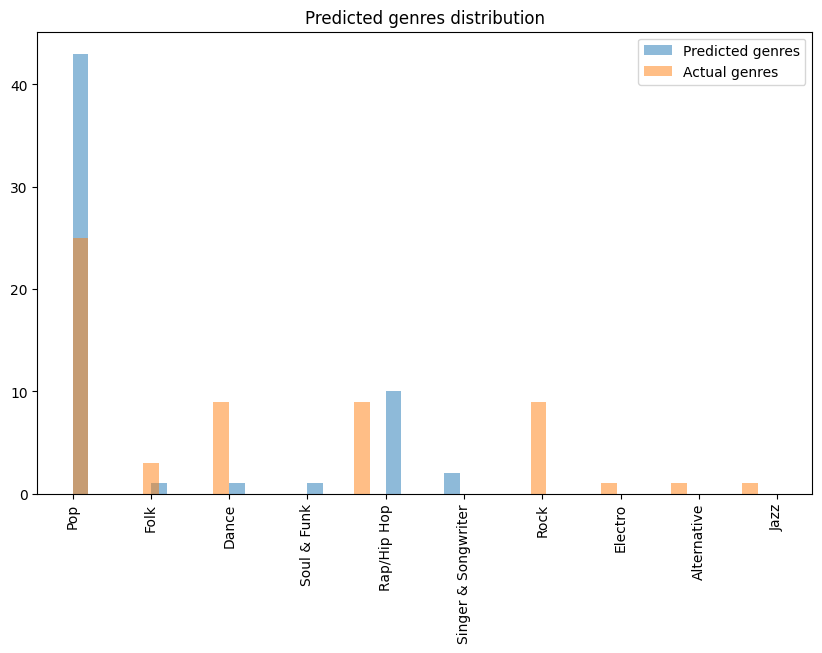

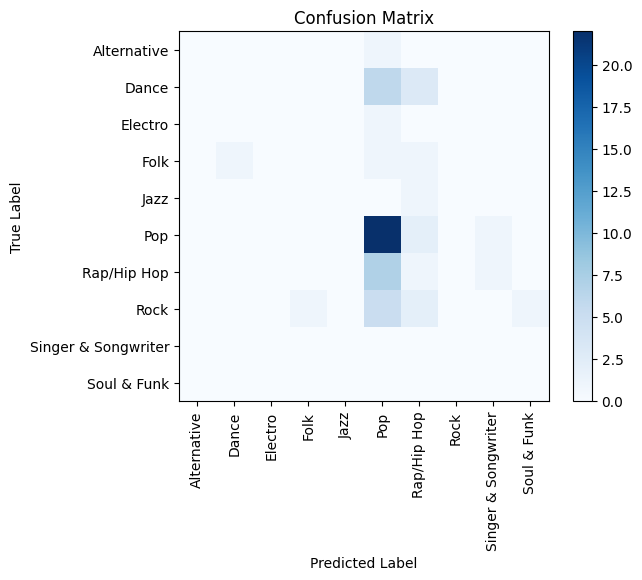

In [97]:
y_pred_styles = []
y_test_styles = []
pred_df = pd.DataFrame(columns=['node_id', 'prediction', 'true_label'])
for i in range(len(y_pred)):
    y_pred_styles.append(styles[y_pred[i]])
    y_test_styles.append(styles[y_test[i]])
    new_line = {}
    new_line['node_id'] = i
    new_line['prediction'] = y_pred_styles[i]
    new_line['true_label'] = y_test_styles[i]
    pred_df = pred_df.append(new_line, ignore_index=True)
#plot y_pred_styles distribution
plt.figure(figsize=(10, 6))
plt.hist(y_pred_styles, bins=20, alpha=0.5, width=0.2)
plt.hist(y_test_styles, bins=20, alpha=0.5, width=0.2)
plt.legend(['Predicted genres', 'Actual genres'])
plt.xticks(rotation=90)
plt.title('Predicted genres distribution')
plt.show()

    
#plot confusion matrix
plot_confusion_matrix(pred_df)

### Neighbor features approach: GraphSAGE

In [ ]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-py38_23.3.1-0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

Couldn't find program: 'bash'


In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.8/site-packages"))

In [ ]:
def mean_neighbors_feature(df_encoded, subgraph, node_id):
    return df_encoded.loc[subgraph.vs[subgraph.neighbors(99)]['ID']].values.mean(axis=0)

In [ ]:
#build feature dataframe for the subgraph

#create columns
X = pd.DataFrame(columns=styles)

for ID in df_encoded.index:
    X.loc[ID] = pd.Series(mean_neighbors_feature(df_encoded, subgraph, ID), index = X.columns)

X.head()


NameError: name 'df_encoded' is not defined

In [ ]:
# Prepare feature matrix and target labels
y = np.array(df_encoded)
print(X.shape)
print(y.shape)

(267, 68)
(267, 68)


In [ ]:
!pip install stellargraph


Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6.0, <3.8.0; 0.11.0 Requires-Python >=3.6.0, <3.8.0; 0.11.1 Requires-Python >=3.6.0, <3.8.0; 0.4.0 Requires-Python >=3.6,<3.7; 0.4.0b0 Requires-Python >=3.6,<3.7; 0.4.1 Requires-Python >=3.5.0, <3.7.0; 0.5.0 Requires-Python >=3.5.0, <3.7.0; 0.6.0 Requires-Python >=3.5.0, <3.7.0; 0.6.1 Requires-Python >=3.5.0, <3.7.0; 0.7.0 Requires-Python >=3.5.0, <3.8.0; 0.7.1 Requires-Python >=3.5.0, <3.8.0; 0.7.2 Requires-Python >=3.5.0, <3.8.0; 0.7.3 Requires-Python >=3.5.0, <3.8.0; 0.8.0 Requires-Python >=3.5.0, <3.8.0; 0.8.1 Requires-Python >=3.5.0, <3.8.0; 0.8.2 Requires-Python >=3.5.0, <3.8.0; 0.8.3 Requires-Python >=3.5.0, <3.8.0; 0.8.4 Requires-Python >=3.5.0, <3.8.0; 0.9.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0rc1 Requires-Python >=3.6.0, <3.8.0; 1.1.0 Requires-Python >=3.6.0, <3.9.0; 1.2.0 Requires-Python >=3.6.0, <3.9.0; 1.2.1 Requires-Python >=3.

In [ ]:
import networkx as nx
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE


ModuleNotFoundError: No module named 'stellargraph'

In [ ]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn.pytorch import GraphConv


ImportError: cannot import name 'GraphSAGE' from 'dgl.nn.pytorch' (C:\Users\alexi\AppData\Roaming\Python\Python311\site-packages\dgl\nn\pytorch\__init__.py)

In [ ]:
# Define the GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, hidden_feats, num_classes):
        super(GraphSAGE, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_feats)
        self.conv2 = GraphConv(hidden_feats, num_classes)

    def forward(self, g, features):
        h = self.conv1(g, features)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

# Create the graph with our subgraph G
g = dgl.DGLGraph(G)



# g = dgl.graph(([0, 1, 2, 3, 4], [1, 2, 3, 4, 0]))
# features = torch.tensor([[0.2, 0.4], [0.1, 0.3], [0.5, 0.7], [0.6, 0.2], [0.8, 0.9]], dtype=torch.float32)
# labels = torch.tensor([0, 1, 1, 0, 1], dtype=torch.long)

# Set the node features and labels
g.ndata['feat'] = encode_df(subgraph,styles, top1 = False)
g.ndata['label'] = encode_df(subgraph,styles, top1 = True)

# Initialize the GraphSAGE model
model = GraphSAGE(in_feats=2, hidden_feats=16, num_classes=2)

# Set the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(50):
    model.train()
    logits = model(g, g.ndata['feat'])
    loss = criterion(logits, g.ndata['label'])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        logits = model(g, g.ndata['feat'])
        pred = torch.argmax(logits, dim=1)
        accuracy = (pred == g.ndata['label']).float().mean()

    print(f'Epoch: {epoch+1}, Loss: {loss.item()}, Accuracy: {accuracy.item()}')


C:\Users\alexi\AppData\Roaming\Python\Python311\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(
C:\Users\alexi\AppData\Local\Temp\ipykernel_7988\331965644.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_encoded = df_encoded.append(new_line, ignore_index=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_7988\331965644.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_encoded = df_encoded.append(new_line, ignore_index=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_7988\331965644.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_encoded = df_encoded.append(new_line, ignore_index=True)
C:\Users\alexi\AppData\Lo

AttributeError: 'DataFrame' object has no attribute 'device'

In [ ]:
A = np.array([1, 2, 3,5, 5, 6])
B = np.array([1, 2, 3,4, 5, 6])
cm = confusion_matrix(A, B)
print(cm)

NameError: name 'confusion_matrix' is not defined

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.columns = styles
y_pred = pd.DataFrame(y_pred)
y_pred.columns = styles

print(y_test.shape)
print(y_pred.shape)
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_cm = np.argmax(y_pred.values, axis=1)
y_test_cm = np.argmax(y_test.values, axis=1)
print(y_pred_cm.shape)
print(y_test_cm.shape)
cm = confusion_matrix(y_test_cm, y_pred_cm)
print(cm.shape)
cm_df = pd.DataFrame(cm, index=styles, columns=styles)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 68 elements

In [ ]:
plot_confusion_matrix(y_test, y_pred)

ValueError: Shape of passed values is (32, 32), indices imply (68, 68)

In [ ]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_cm = np.argmax(y_pred, axis=1)
y_test_cm = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_cm, y_pred_cm)
#normalise
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=False, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#put lables in x axis

plt.xticks(np.arange(10), styles, rotation=45)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size=15)
plt.show()


ValueError: Shape of passed values is (565, 1), indices imply (565, 68)

# Node2vEc 2

In [45]:
#%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-py38_23.3.1-0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

SyntaxError: invalid syntax (1246331408.py, line 3)

In [46]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.8/site-packages"))

In [47]:
!pip install stellargraph

Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6.0, <3.8.0; 0.11.0 Requires-Python >=3.6.0, <3.8.0; 0.11.1 Requires-Python >=3.6.0, <3.8.0; 0.4.0 Requires-Python >=3.6,<3.7; 0.4.0b0 Requires-Python >=3.6,<3.7; 0.4.1 Requires-Python >=3.5.0, <3.7.0; 0.5.0 Requires-Python >=3.5.0, <3.7.0; 0.6.0 Requires-Python >=3.5.0, <3.7.0; 0.6.1 Requires-Python >=3.5.0, <3.7.0; 0.7.0 Requires-Python >=3.5.0, <3.8.0; 0.7.1 Requires-Python >=3.5.0, <3.8.0; 0.7.2 Requires-Python >=3.5.0, <3.8.0; 0.7.3 Requires-Python >=3.5.0, <3.8.0; 0.8.0 Requires-Python >=3.5.0, <3.8.0; 0.8.1 Requires-Python >=3.5.0, <3.8.0; 0.8.2 Requires-Python >=3.5.0, <3.8.0; 0.8.3 Requires-Python >=3.5.0, <3.8.0; 0.8.4 Requires-Python >=3.5.0, <3.8.0; 0.9.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0rc1 Requires-Python >=3.6.0, <3.8.0; 1.1.0 Requires-Python >=3.6.0, <3.9.0; 1.2.0 Requires-Python >=3.6.0, <3.9.0; 1.2.1 Requires-Python >=3.

In [39]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

ModuleNotFoundError: No module named 'stellargraph'